<img src=https://api-manager.universia.net/coreplatform-document-management/api/document-management/public/6ra7ymjkfi64845 width="300" align="left">
<br />

# Aprendizaje automático I
#### <font color=green>*Máster en Informática Industrial y Robótica*</font>

Daniel Vidal Soroa  
Juan Diego Peña 

## Clasificación de mangos en tres clases según su presencia para la exportación, comercio local o procesamiento industrial

#### Importación de las librerías:

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils import shuffle
from skimage.io import imread
from skimage.transform import resize
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix, classification_report, multilabel_confusion_matrix
from sklearn.model_selection import train_test_split
from random import seed
from random import randint
from tensorflow import keras
from keras import layers, models, utils, datasets
from keras import utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold, GridSearchCV

In [2]:
%store -r scoring X X_train X_val CV t t_val f n 

#### Validación cruzada con Random Forest

In [3]:
modelRF = RandomForestClassifier(n_estimators=20, criterion='gini')
scoresRF = cross_validate(modelRF, X, t, cv=CV, scoring=scoring)
print('Media del KNN : ', np.mean(scoresRF['test_accuracy']))

Media del KNN :  0.9690740740740742


In [4]:
df = pd.DataFrame.from_dict(scoresRF)
df.drop(df.iloc[:, 0:2], inplace = True, axis = 1)
df.loc[5]=[np.mean(scoresRF['test_recall_macro']),np.mean(scoresRF['test_precision_macro']),np.mean(scoresRF['test_f1_macro']),np.mean(scoresRF['test_accuracy']),np.mean(scoresRF['test_roc_auc_ovo'])]
df.index = ["CV 1","CV 2","CV 3","CV 4","CV 5","Average"]
df.to_excel("./informe/tables/RF.xlsx") 
print(df)

         test_recall_macro  test_precision_macro  test_f1_macro  \
CV 1              0.967593              0.967709       0.967628   
CV 2              0.969444              0.969830       0.969534   
CV 3              0.959259              0.959301       0.959220   
CV 4              0.972222              0.972452       0.972223   
CV 5              0.976852              0.976825       0.976823   
Average           0.969074              0.969223       0.969085   

         test_accuracy  test_roc_auc_ovo  
CV 1          0.967593          0.997931  
CV 2          0.969444          0.998137  
CV 3          0.959259          0.996611  
CV 4          0.972222          0.998529  
CV 5          0.976852          0.998025  
Average       0.969074          0.997847  


### Analisis hiper-parametros Random Forest

In [5]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
param_grid = {#'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               #'max_depth': max_depth,
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

search = GridSearchCV(estimator = modelRF, param_grid =param_grid, n_jobs=-1,cv=CV,scoring=scoring,verbose=1,refit=False)
search_results = search.fit(X,t)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


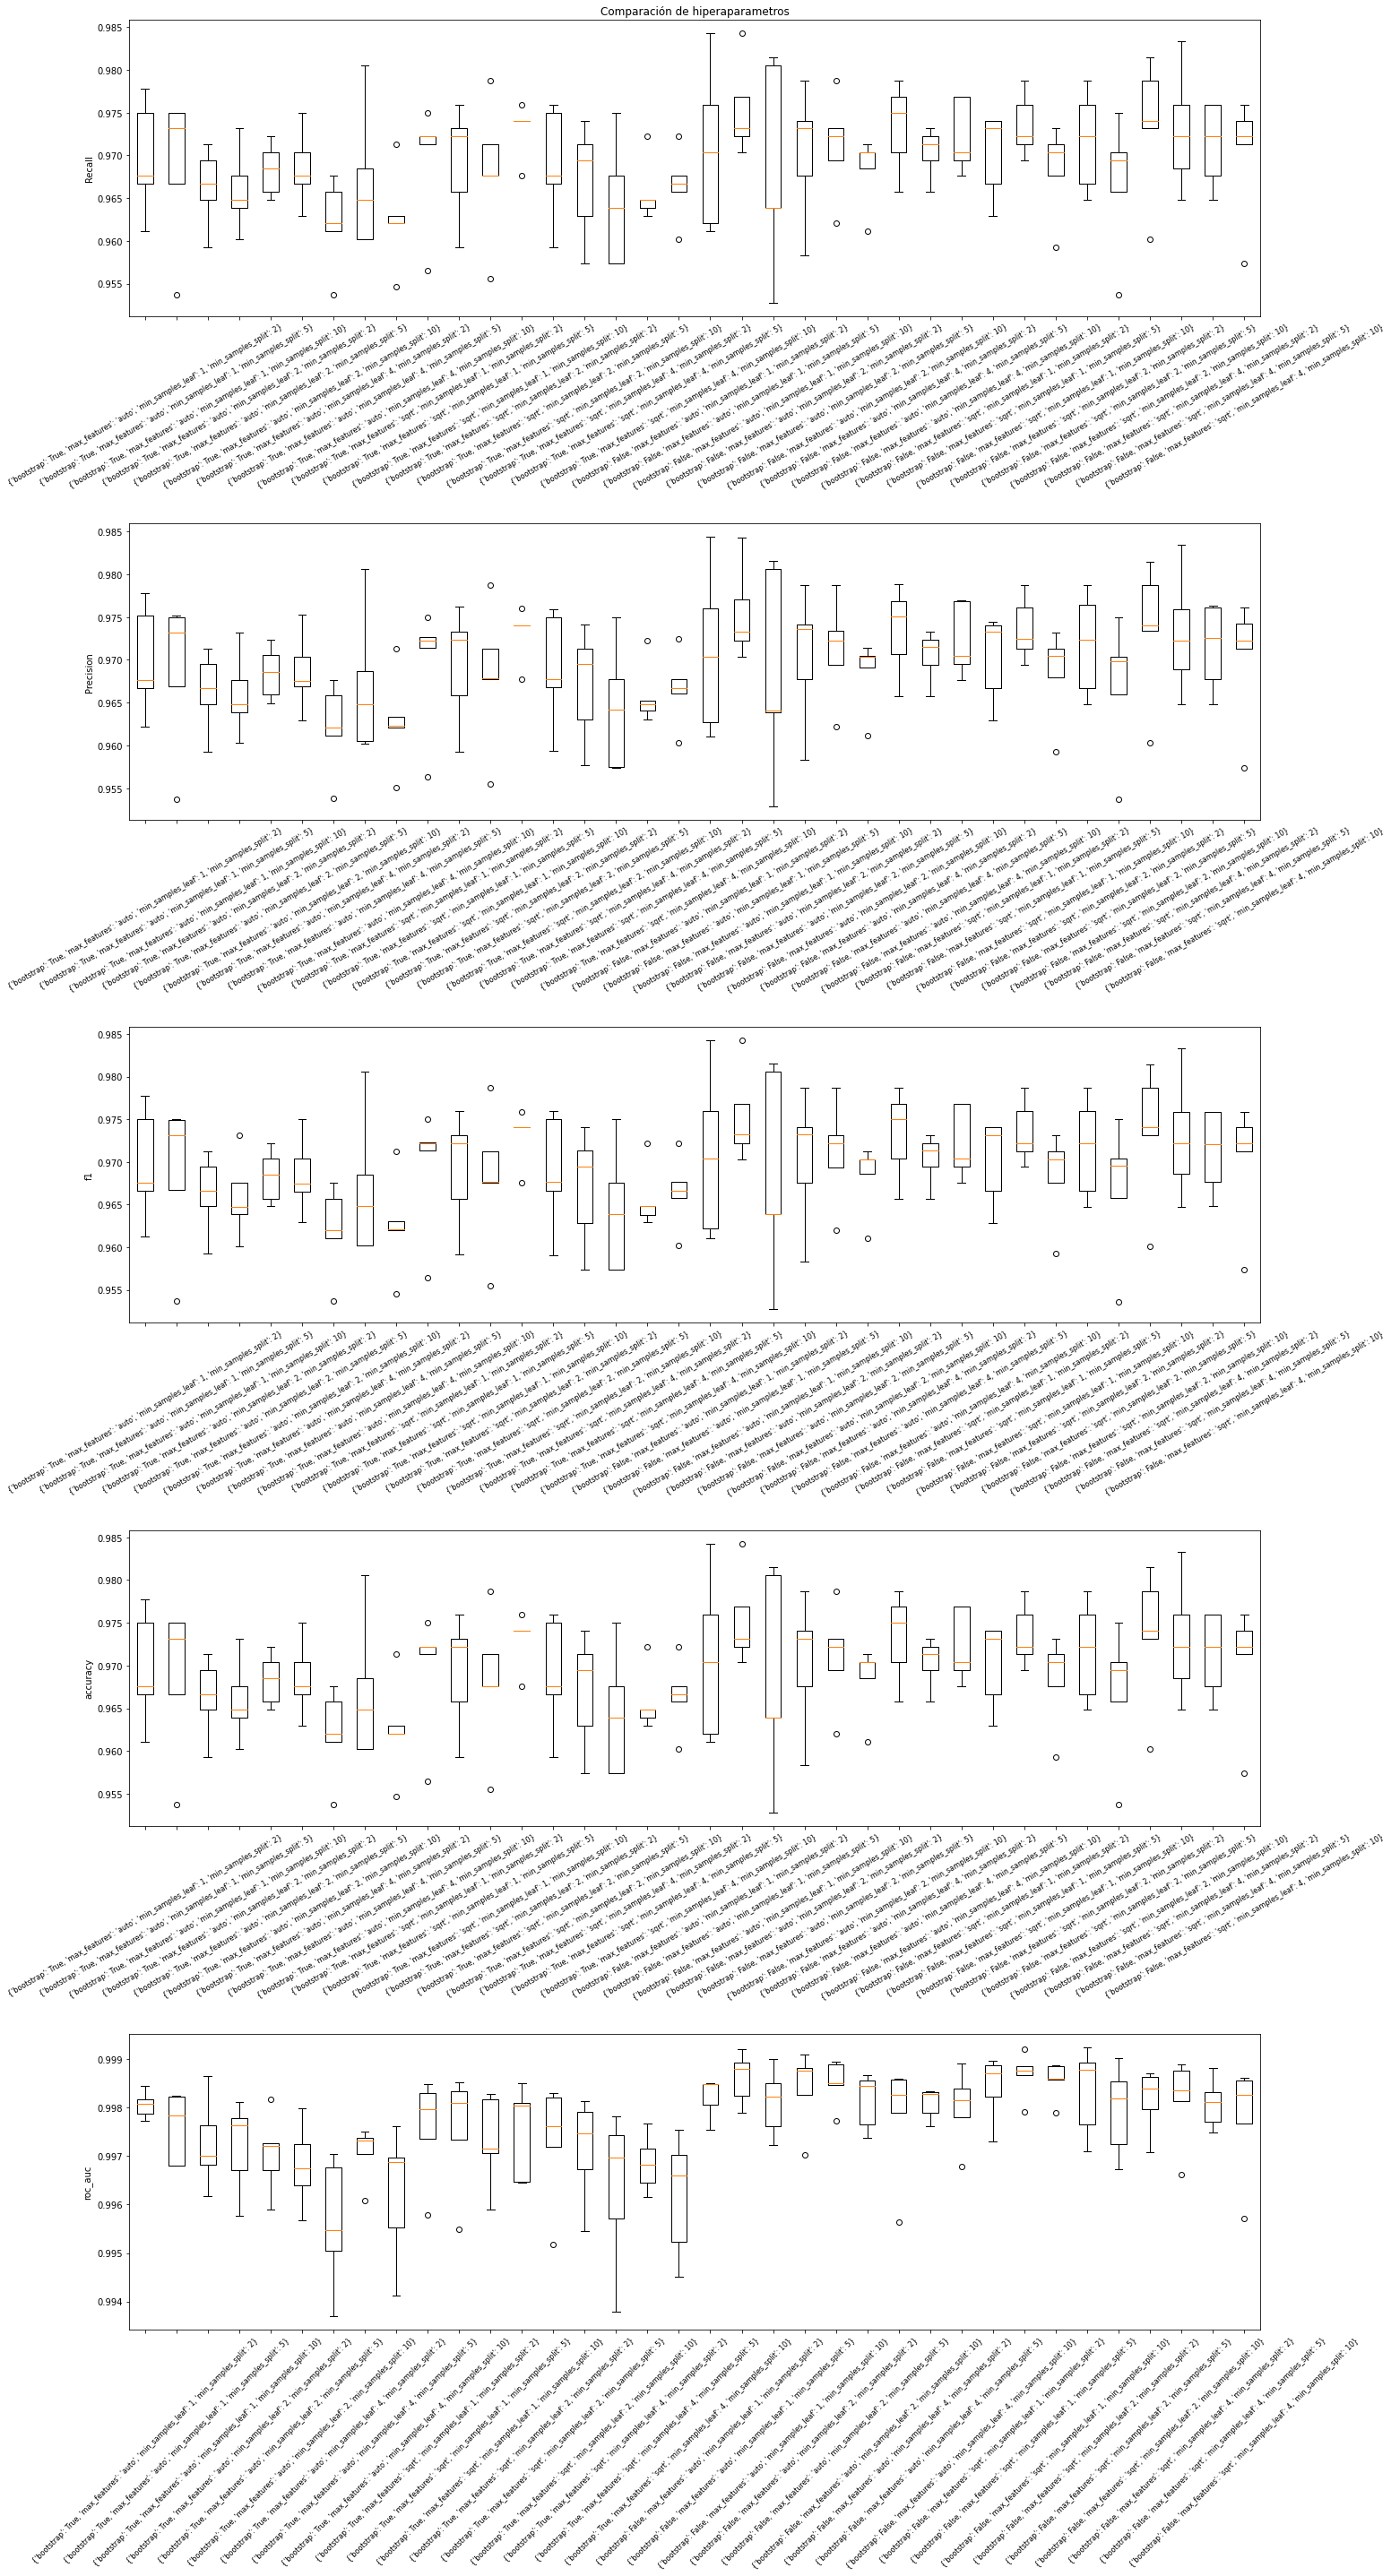

In [21]:
df = pd.DataFrame.from_dict(search_results.cv_results_)
#df.to_excel("./informe/tables/parameters_knn.xlsx") 
labels = df['params']

data_recall =[]
data_precision = []
data_f1 =[]
data_accuracy = []
data_roc_auc  =[]


for c in range(len(labels)): 
    data_recall.append(df.iloc[c,9:14].to_list())  
    data_precision.append(df.iloc[c,17:22].to_list())  
    data_f1.append(df.iloc[c,25:30].to_list())  
    data_accuracy.append(df.iloc[c,33:38].to_list())  
    data_roc_auc.append(df.iloc[c,41:46].to_list())    





fig, ax = plt.subplots(5,1)

ax[0].boxplot(data_recall,labels=labels)
ax[0].set_xticklabels(labels=labels,rotation=30, fontsize=8)
ax[0].set(
    axisbelow=True,  # Hide the grid behind plot objects
    title='Comparación de hiperaparametros',
    ylabel='Recall'
    )

ax[1].boxplot(data_precision,labels=labels)
ax[1].set_xticklabels(labels=labels,rotation=30, fontsize=8)
ax[1].set(
    axisbelow=True,  # Hide the grid behind plot objects
    ylabel='Precision'
)

ax[2].boxplot(data_f1,labels=labels)
ax[2].set_xticklabels(labels=labels,rotation=30, fontsize=8)
ax[2].set(
    axisbelow=True,  # Hide the grid behind plot objects
    ylabel='f1'
)


ax[3].boxplot(data_accuracy,labels=labels)
ax[3].set_xticklabels(labels=labels,rotation=30, fontsize=8)
ax[3].set(
    axisbelow=True,  # Hide the grid behind plot objects
    ylabel='accuracy'
)


ax[4].boxplot(data_roc_auc,labels=labels)
ax[4].set_xticklabels(labels=labels,rotation=45, fontsize=8)
ax[4].set(
    axisbelow=True,  # Hide the grid behind plot objects
    ylabel='roc_auc'
)
fig.subplots_adjust(left=0.08, right=3, bottom=0.05, top=9,
                    hspace=0.7, wspace=0.01)

plt.show()
